<a href="https://colab.research.google.com/github/marjorieariele/Projetos-IA/blob/main/Trabalho_de_Processos_Estoc%C3%A1sticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disciplina Processos Estocásticos - Período 2025/1**

**Projeto:** Análise de Sequências de DNA Usando Cadeias de Markov  
**Professor:** Fidelis Zanetti de Castro  
4 de junho de 2025

**Grupo**:  
Marjorie  
Bruno Smit   
Fabiano Correa   


# 1. Introdução

Este trabalho tem como objetivo aplicar teorias de processos estocásticos em um problema real de biologia computacional, passando pelas seguintes etapas:  

1. Escolher, obter e processar dados de uma sequência de DNA real;
2. Calcular uma matriz de transição real entre bases nitrogenadas;
3. Gerar novas sequências sintéticas com características estatísticas similares às reais;
4. Comparar as Estatísticas entre as sequências reais e sintéticas;
5. Visualizar graficamente e interpretar os resultados obtidos.


# 2. Metodologia

## 2.1. Obtenção e Escolha da sequência de DNA


Será utilizado o banco de dados da NCBI (National Center for Biotechnology Information), pois é o mais comum para iniciantes e acessível pelo link https://www.ncbi.nlm.nih.gov/.  

Neste, existe o banco "Nucleotide", que contém sequências de DNA. Dentre as opções, será escolhido, aleatoriamente, um dos diversos genes disponíveis. O acesso a sequência será feita de forma on-line, acessando o formato GenBank (“.GB”). Para tanto será usado o submódulo *Entrez* da biblioteca *biopython*.


## 2.2. Processar dados

Todo o projeto será desenvolvido na linguagem Python, através do GoogleColab. Será utilizado o submódulo SeqIO da biblioteca *biopython* para o tratamento dos dados. Esta traz a opção de separar a sequência em FASTA do arquivo GB lido.

## 2.3. Calcular Matriz de Transição

Utilizando o conceito de Cadeias de Markov, serão calculadas as 16 probabilidades normalizadas de transição possível entre as bases nitrogenadas do DNA (A, T, C, G) e organizá-los em forma de matriz, formando a Matriz de Transição. Para tanto será utilizada a biblioteca *collections* e *numpy*.

## 2.4. Gerar sequências sintéticas do DNA

Através da biblioteca *random* será gerada uma sequência de DNA com o mesmo tamanho (quantidade de bases nitrogenada) da sequência real, tendo como pesos para as escolhas do comando *random.choice* a Matriz de Transição do gene real.

## 2.5. Análises

Para a análise serão gerados e comparados, entre as sequências real e sintética, cálculos e gráficos relativos à:

* Frequência das bases;
* Distribuição de pares consecutivos;
* Comprimento médio de blocos consecutivos da mesma base;
* Visualizações gráficas: barras, heatmap, histogramas;

Para tanto serão usadasas bibliotecas *matplotlib*, *seaborn* e *collections*. Os gráficos e suas configurações serão adequadas de acordo com os resultados, buscando a melhor forma de análise e facilitar as conclusões e reflexões.




# 3. Resultados obtidos

In [ ]:
# Instala a biblioteca Biopython, usada para manipulação de dados biológicos
%pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.7 MB/s eta 0:00:00


## 3.1. Obtenção e Escolha da sequência de DNA

In [ ]:
# Importa os módulos necessários do Biopython
from Bio import Entrez, SeqIO

# Informe seu email (obrigatório para usar o Entrez)
Entrez.email = "fabianocsilva@hotmail.com"

# ID da sequência no NCBI (ex: NM_001145362 é o SARS1 humano)
id_ncbi = "NM_006513.4"

# Baixar a sequência diretamente
handle = Entrez.efetch(db="nucleotide", id=id_ncbi, rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
# Fecha a conexão
handle.close()

# Agora 'record' tem o mesmo conteúdo que você teria com um arquivo .gb local

## 3.2. Processar dados

In [ ]:
# Exibe informações básicas sobre a sequência genética obtida
# Exemplo: mostrar o ID, descrição e as primeiras 50 bases
print("ID:", record.id)
print("Descrição:", record.description)
print("Sequência:", record.seq)
print("Número de caracteres na sequência:", len(record.seq))

ID: NM_006513.4
Descrição: Homo sapiens seryl-tRNA synthetase 1 (SARS1), transcript variant 1, mRNA
Sequência: GCAGTGCGGCGGTCACAGGCTGAGTGCTGCGGCGCGATCCTTGCTTCCCTGAGCGTTGGCCCGGGAGGAAAGAAGATGGTGCTGGATCTGGATTTGTTTCGGGTGGATAAAGGAGGGGACCCAGCCCTCATCCGAGAGACGCAGGAGAAGCGCTTCAAGGACCCGGGACTAGTGGACCAGCTGGTGAAGGCAGACAGCGAGTGGCGACGATGTAGATTTCGGGCAGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATCGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAGATGATGAGTCTGTCCCAGAGAATGTGCTGAGTTTCGATGACCTTACTGCAGACGCTTTAGCTAACCTGAAAGTCTCACAAATCAAAAAAGTCCGACTCCTCATTGATGAAGCCATCCTGAAGTGTGACGCGGAGCGGATAAAGTTGGAAGCAGAGCGGTTTGAGAACCTCCGAGAGATTGGGAACCTTCTGCACCCTTCTGTACCCATCAGTAACGATGAGGATGTGGACAACAAAGTAGAGAGGATTTGGGGTGATTGTACAGTCAGGAAGAAGTACTCTCATGTGGACCTGGTGGTGATGGTAGATGGCTTTGAAGGCGAAAAGGGGGCCGTGGTGGCTGGGAGTCGAGGGTACTTCTTGAAGGGGGTCCTGGTGTTCCTGGAACAGGCTCTCATCCAGTATGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTATACCCCCTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAACTTTATAAGGTGATTGGCAAAGGCAGTGAAAAGTCTGATGACAACTCCTATGATGAGAAGTACCTGATTGCCACCT

## 3.3. Calcular Matriz de Transição

In [ ]:
from collections import defaultdict
import numpy as np

bases = ['A', 'T', 'C', 'G']

sequence = str(record.seq).upper()

# Contadores
transition_counts = defaultdict(int)
base_counts = defaultdict(int)

# Contagem de transições
for i in range(len(sequence) - 1):
    a, b = sequence[i], sequence[i+1]
    if a in 'ATCG' and b in 'ATCG':
        transition_counts[(a, b)] += 1
        base_counts[a] += 1

# Matriz de probabilidades
matrix = np.zeros((4, 4))

for i, a in enumerate(bases):
    total = base_counts[a]
    for j, b in enumerate(bases):
        matrix[i, j] = transition_counts.get((a, b), 0) / total if total > 0 else 0



In [ ]:
# Imprimir tabela formatada
header = "       |  " + "   |  ".join(bases) + "   |"
separator = "-" * len(header)

print(header)
print(separator)

for i, a in enumerate(bases):
    row = f"   {a}   | " + " | ".join(f"{matrix[i,j]:.2f}" for j in range(4)) + " |"
    print(row)

       |  A   |  T   |  C   |  G   |
------------------------------------
   A   | 0.25 | 0.21 | 0.19 | 0.35 |
   T   | 0.11 | 0.23 | 0.26 | 0.40 |
   C   | 0.29 | 0.27 | 0.32 | 0.12 |
   G   | 0.33 | 0.17 | 0.22 | 0.27 |


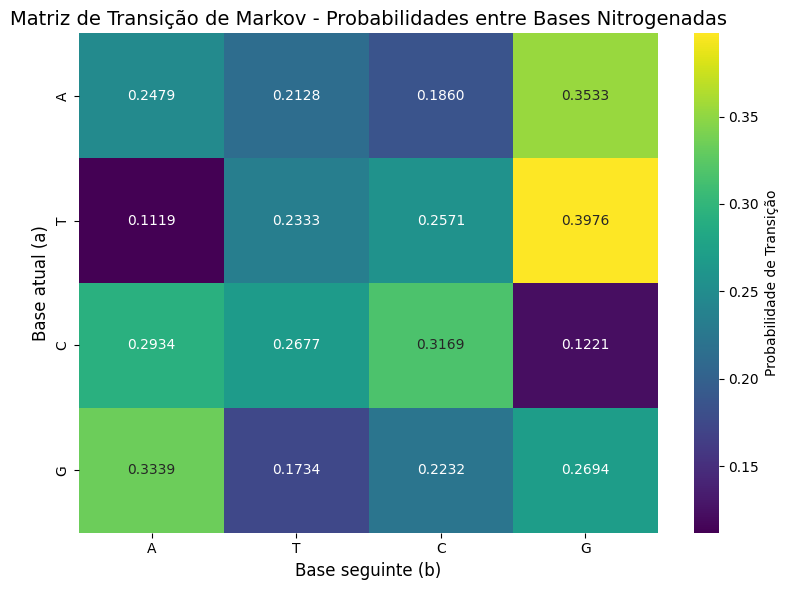

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Transformando a matriz numpy em DataFrame do pandas para melhor visualização
import pandas as pd

df_matrix = pd.DataFrame(matrix, index=bases, columns=bases)

# Plotando o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_matrix, annot=True, cmap="viridis", fmt=".4f", cbar_kws={'label': 'Probabilidade de Transição'})

# Configurações extras
plt.title("Matriz de Transição de Markov - Probabilidades entre Bases Nitrogenadas", fontsize=14)
plt.xlabel("Base seguinte (b)", fontsize=12)
plt.ylabel("Base atual (a)", fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

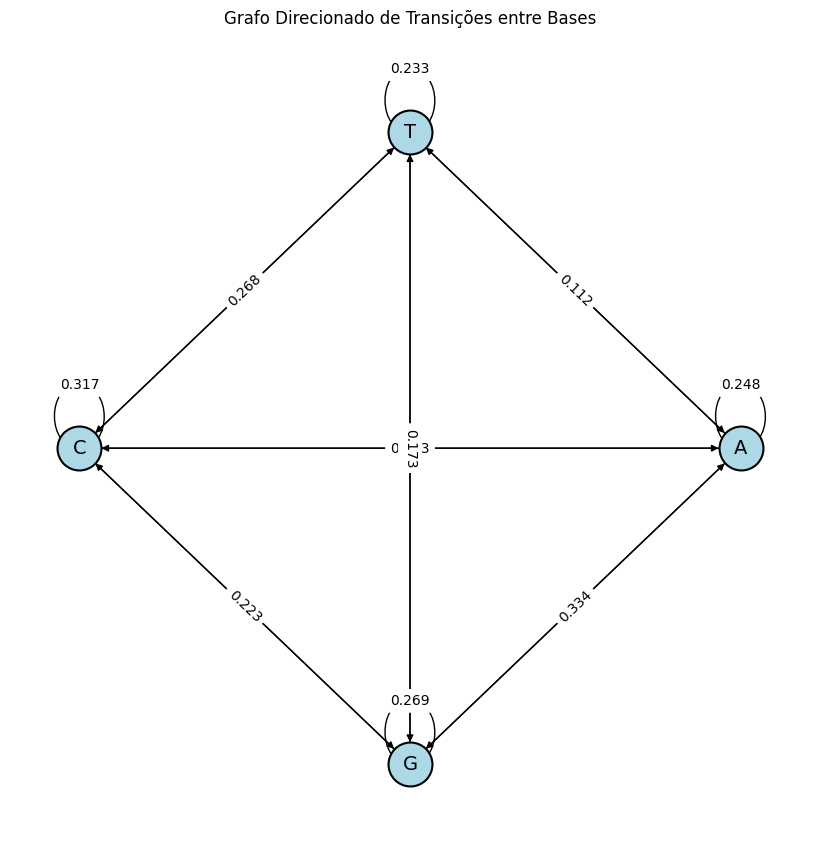

In [ ]:
import networkx as nx

G = nx.DiGraph()

# Adicionar nós e arestas com pesos
for i, a in enumerate(bases):
    for j, b in enumerate(bases):
        weight = matrix[i, j]
        if weight > 0:
            G.add_edge(a, b, weight=weight)

pos = nx.circular_layout(G)
edges = G.edges(data=True)

plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=14,
        node_color='lightblue', edgecolors='black', linewidths=1.5)

edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Grafo Direcionado de Transições entre Bases")
plt.show()

## 3.4. Gerar sequências sintéticas do DNA

In [ ]:
import random

# Matriz de transição real

transition_matrix = matrix

# Mapeamento das bases
base_to_index = {'A': 0, 'T': 1, 'C': 2, 'G': 3}

# Função para gerar sequência sintética
def generate_sequence(matrix, length=1914, start_base='A'): # Gerando sequência de 1914 bases, conforme gene original.
    current_base = start_base
    sequence = current_base

    for _ in range(length - 1):
        probs = matrix[base_to_index[current_base]]
        current_base = random.choices(bases, weights=probs, k=1)[0]
        sequence += current_base

    return sequence

# Gerar sequência de exemplo
synthetic_seq = generate_sequence(transition_matrix)
print("Sequência sintética:")
print(synthetic_seq)
print("Número de bases na sequência sintética:", len(record.seq))


Sequência sintética:
AGAAGCAAAGAACCTCTAGGCATGACAGTCCGAGCTGACCGGAATCCAGCAGATCAGTTTCCACGGCCGTGTGACACGTCAAGATATGGCGTAGGAGCGTAAAAACTCAGTGTCCAAGGATTTTGCTGTCAAGCTCCAGATGGCATCAGGTGACATCCTGCTTGGCCAGGGGAGGAACGATTCTACGGGACGCTGCTAAGCAGAATGTGATTGATCGGGCGGTCAAAGGTTATTTTGCAGGAATTGTGCGATGCTTTGTGGACCAATCGCACCCCTTGGAGGGGACCCAGACCATGAGAGTGAAGTTTGAGCACGGTTTCCGATCAGTGATTGTGTGCCGGAGACAAGGGTCTGGATTGTAGGTTCGCGTCGAAAGCTATGATTCAGGGAAAAGATTGTCTGAGGAAAGGTTAGCAAGACTGAACCTATTGGCTGTTGATGGGCAATCCCTCTCGTACGGCCCCCCCGTGTCCTAAACAGGGTGAGTGACCCCTGAGAGCGCGAACGACTGTCTCCAACCGGGACTCTGGGTGACTTAGAGCATGAGAAGGCAAATGGCAGTCGCCTCCGGGACTGCCTGGCAGTGCACAAGATGGCCCCTTTTCAGCTGCTCCTCATGAGTAGTCCCCCCTCTGGGGCCTCCACAGCTGAAGTCCACCTAGGCAAGTGAGGCTCTGAGTCAGCCACCTGAACCTCAACTGCCGGGCCCTGCAAGGAAAGAGACAATCTCCAAATCTAGAATCATCTCACTGGTGTCCTCGCGTGAATGATGAGGGCCGGATAAGGTCAATAGATGCACCTGTGCTTCTGTTCCTTGAGCGTGTGGAGACGACTCCGGGGACGGACAGCTTGAAGAACGTTCCGGAATCGGGAGATGGTTAATCATGACTGTCACTCTCAGTGCCCCAATTGTGACCCTTATGAGAACCGGACCGAATGCCCCTCTGCCTTAAACTGGAGAATTGTGCCCTTCCCTTGG

## 3.5. Análise e Gráficos

In [ ]:
# Importando bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# Preparando dados
real_seq = str(record.seq).upper()        # Sequência real (do NCBI)
synthetic_seq = synthetic_seq             # Sequência sintética gerada antes

### 3.5.1. Calcular frequências absolutas e relativas

In [ ]:
# Função para calcular a contagem e frequência de cada base (A, T, C, G) em uma sequência
def base_frequencies(seq):
    counts = Counter(seq)
    total = len(seq)

    # Aqui está usando apenas as contagens absolutas (não normalizadas)
    # freqs = {base: count / total for base, count in counts.items()}
    freqs = {base: count for base, count in counts.items()}
    return counts, freqs

# Aplica a função à sequência real
real_counts, real_freqs = base_frequencies(real_seq)

# Aplica a função à sequência sintética gerada pela cadeia de Mark
synth_counts, synth_freqs = base_frequencies(synthetic_seq)

print("Frequência real:", real_freqs)
print("Frequência sintética:", synth_freqs)

Frequência real: {'G': 542, 'C': 467, 'A': 485, 'T': 420}
Frequência sintética: {'A': 482, 'G': 564, 'C': 470, 'T': 398}


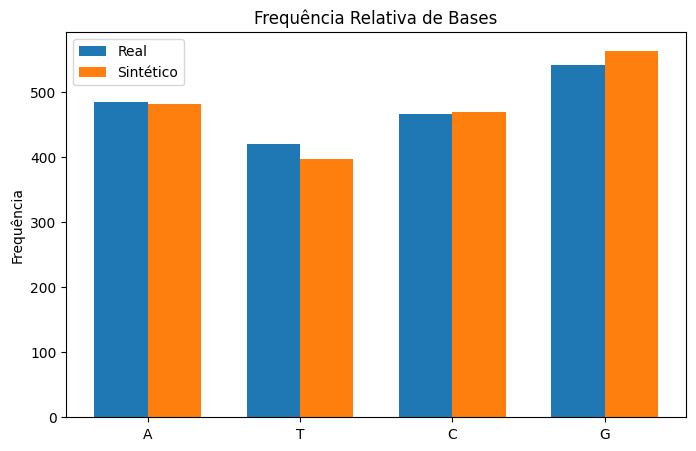

In [ ]:
# Cria listas com as frequências de cada base (A, T, C, G) para as sequências real e sintética
# Caso alguma base esteja ausente, seu valor será 0
freq_real = [real_freqs.get(b, 0) for b in bases]
freq_synth = [synth_freqs.get(b, 0) for b in bases]

# Define as posições no eixo x para cada barra
x = np.arange(len(bases))
width = 0.35

# Configura o tamanho da figura do gráfico
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, freq_real, width, label='Real')
plt.bar(x + width/2, freq_synth, width, label='Sintético')

# Define os rótulos do eixo x
plt.xticks(x, bases)
plt.ylabel('Frequência')
plt.title('Frequência Relativa de Bases')
plt.legend()
plt.show()

### 3.5.2. Contar pares consecutivos (transições)

In [ ]:
# Função: contar pares consecutivos
def count_pairs(seq):
    pairs = Counter()
    for i in range(len(seq) - 1):
        a, b = seq[i], seq[i+1]
        if a in 'ATCG' and b in 'ATCG':
            pairs[(a, b)] += 1
    return pairs

# Função: sequências real e sintética
real_pairs = count_pairs(real_seq)
synth_pairs = count_pairs(synthetic_seq)

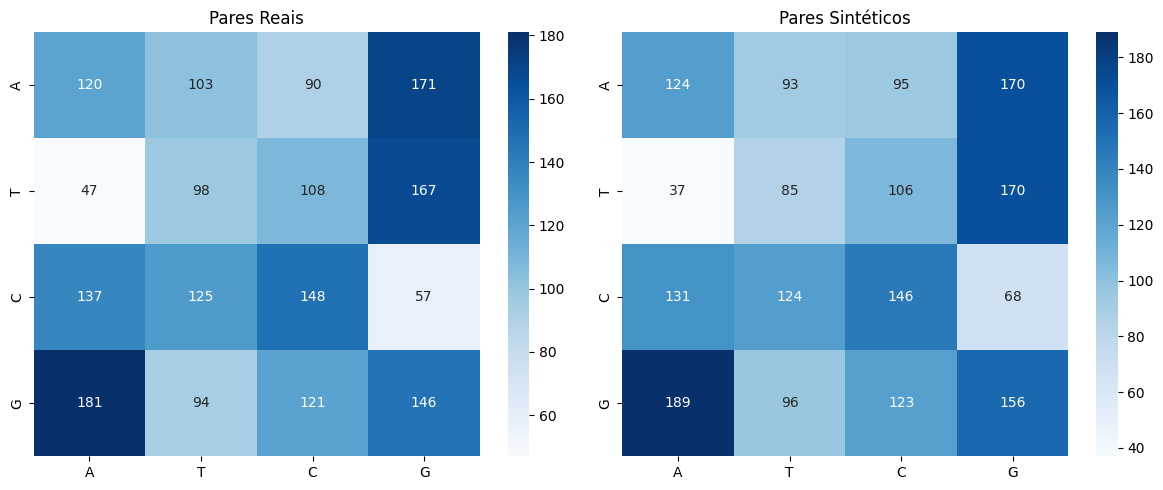

In [ ]:
def pair_matrix(pairs):
    matrix = np.zeros((4, 4))
    bases = ['A', 'T', 'C', 'G']
    idx = {b: i for i, b in enumerate(bases)}
    for (a, b), count in pairs.items():
        matrix[idx[a], idx[b]] = count
    return matrix

# Gera as matrizes de pares para a sequência real e sintética
matrix_real = pair_matrix(real_pairs)
matrix_synth = pair_matrix(synth_pairs)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(matrix_real, annot=True, fmt=".0f", xticklabels=bases, yticklabels=bases, ax=axes[0], cmap="Blues")
axes[0].set_title("Pares Reais")

sns.heatmap(matrix_synth, annot=True, fmt=".0f", xticklabels=bases, yticklabels=bases, ax=axes[1], cmap="Blues")
axes[1].set_title("Pares Sintéticos")
plt.tight_layout() # Ajusta o layout para melhor visualização
plt.show()

### 3.5.3. Blocos consecutivos da mesma base

In [ ]:
def run_lengths(seq):
    runs = []
    current_base = seq[0]
    count = 1
    for base in seq[1:]:
        if base == current_base:
            count += 1
        else:
            runs.append(count)
            current_base = base
            count = 1
    runs.append(count)  # último bloco
    return runs

real_runs = run_lengths(real_seq)
synth_runs = run_lengths(synthetic_seq)

mean_real = np.mean(real_runs)
mean_synth = np.mean(synth_runs)

print(f"Média de blocos reais: {mean_real:.2f}")
print(f"Média de blocos sintéticos: {mean_synth:.2f}")

Média de blocos reais: 1.37
Média de blocos sintéticos: 1.36


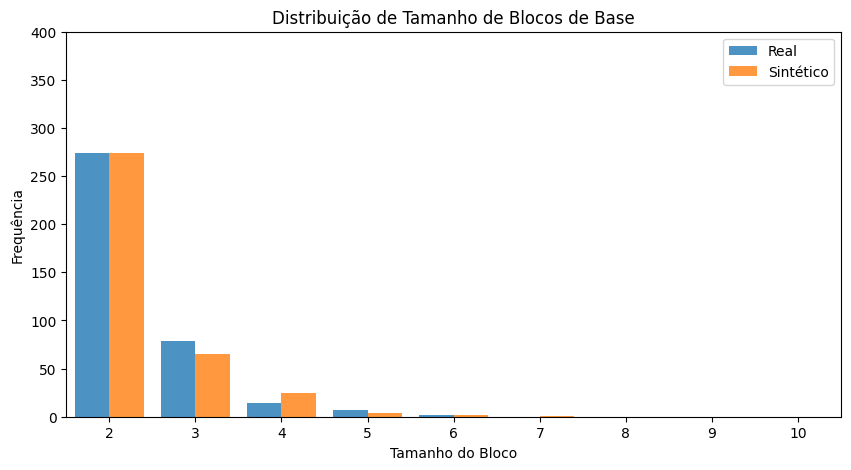

In [ ]:
plt.figure(figsize=(10, 5))

# Exclude blocks of size 1
bins = np.arange(2, 20) # Start bins from 2 to exclude size 1
width = 0.4

# Calculate histograms separately
hist_real, bin_edges = np.histogram(real_runs, bins=bins)
hist_synth, _ = np.histogram(synth_runs, bins=bins)

# Adjust x positions for side-by-side bars
x_pos = bin_edges[:-1]

plt.bar(x_pos - width/2, hist_real, width, label='Real', alpha=0.8)
plt.bar(x_pos + width/2, hist_synth, width, label='Sintético', alpha=0.8)


plt.title("Distribuição de Tamanho de Blocos de Base")
plt.xlabel("Tamanho do Bloco")
plt.ylabel("Frequência")
plt.xticks(x_pos) # Set ticks at the left edge of the pairs of bars
plt.xlim(1.5, 10.5) # Adjust x-axis limit to start from 1.5
plt.ylim(0, 400) # Set the y-axis limit to 400
plt.legend()
plt.show()

# 4. Conclusão e reflexão crítica

Este trabalho demonstrou a aplicação prática de teorias de cadeias de Markov, em um problema real de biologia computacional: a modelagem de sequências genéticas.
- Obtenção e Processamento de Dados: Uma sequência de DNA real foi obtida do banco de dados NCBI (National Center for Biotechnology Information), que permite o usao de dados confiáveis e representativos de sequências biológicas reais.
- Matriz de Transição: Com base na sequência real, foi construída uma matriz de transição que capturou as probabilidades de transição entre bases nitrogenadas (A, T, C, G). Essa matriz serviu como base para gerar sequências sintéticas com características estatísticas similares às originais.
- Geração de Sequências Sintéticas: Utilizando a matriz de transição calculada, foram geradas sequências sintéticas que imitaram as distribuições estatísticas observadas na sequência original. Dessa forma é possivel avaliar a capacidade do modelo em reproduzir padrões observados em sequências biológicas.

Os resultados mostraram uma boa aproximação entre as distribuições das sequências reais e sintéticas, validando a eficácia do modelo em reproduzir características estatísticas básicas das sequências genéticas.

**Observações e Limitações**:

Embora os resultados obtidos mostrem que o modelo é capaz de gerar sequências sintéticas com distribuição estatística semelhante à das sequências reais, ele pode não ser adequado para representar padrões mais complexos presentes em sequências biológicas reais. Outra limitação é que o modelo não leva em conta aspectos funcionais das sequências, como códons, regiões codificantes, e mesmo que as sequências sintéticas sejam estatisticamente similares elas podem não ter significado biológico.